Count number of images in each folder and make initial splits

In [51]:
import os
root_path = '..\\data\\seals\\'

classes = dict()
min = 40

#Count number of images in each folder
for folder in os.listdir(root_path):
    classes[folder] = len(os.listdir(root_path + folder))
    
#Create a open-closed split with class names and their respective image paths (n>=40)
in_labels = []
in_images = []
out_images = []

in_dict = dict()

for folder in os.listdir(root_path):
    if classes[folder] >= min:
        in_dict[folder] = classes[folder]
        for image in os.listdir(root_path + folder):
            in_labels.append(folder)
            in_images.append(f'{folder}\\{image}') 
    else:
        for image in os.listdir(root_path + folder):
            out_images.append(f'{folder}\\{image}')

#Give each class name a unique integer
indices = list(set(in_labels))
label_to_int = dict(zip(indices, range(len(indices))))
for i in range(len(in_labels)):
    in_labels[i] = label_to_int[in_labels[i]]

out_data = list(zip(out_images, [0]*len(out_images)))
in_data  = list(zip(in_images, in_labels))

num_classes = len(in_dict.keys())

#Create a train-test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(in_data, test_size=0.2, random_state=42)
test, val = train_test_split(test, test_size=0.5, random_state=42)

#Validate the split
len(train) + len(val) + len(test) == len(in_data)

True

In [54]:
len(in_dict)

43

Export splits as csv

In [53]:
#Export all splits to csv files
import csv
with open('train.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(train)

with open('val.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(val)

with open('test_known.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(test)

with open('test_unknown.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows((out_data))

(array([820., 247., 100.,  54.,  51.,  27.,  21.,  12.,  11.,   7.,   5.,
          8.,   4.,   2.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([  0.  ,   5.25,  10.5 ,  15.75,  21.  ,  26.25,  31.5 ,  36.75,
         42.  ,  47.25,  52.5 ,  57.75,  63.  ,  68.25,  73.5 ,  78.75,
         84.  ,  89.25,  94.5 ,  99.75, 105.  ]),
 <BarContainer object of 20 artists>)

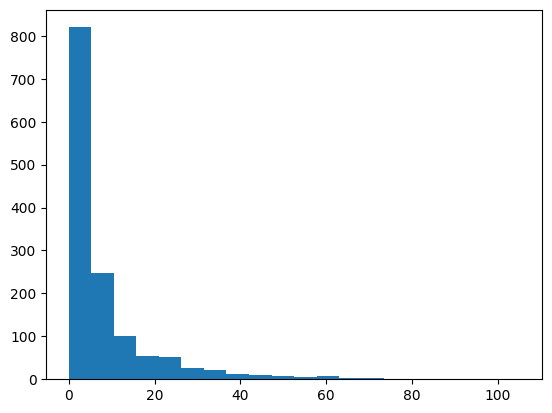

In [15]:
import matplotlib.pyplot as plt

plt.hist(classes.values(), bins=20)